In [1]:
from ase.build import bulk
from ase import Atoms

from typing import Optional, Any

from pyiron_workflow_lammps.engine import LammpsEngine
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize
from pyiron_workflow_atomistics.calculator import calculate_structure_node

import pyiron_workflow as pwf
from pyiron_workflow import Workflow

%load_ext autoreload
%autoreload 2

In [2]:
lmp_cmd = "lmp"

# Static Lammps Test

In [3]:
structure = bulk("Fe") * [10,10,10]
structure.rattle(0.3)
structure[0].symbol = "Al"
structure[10].symbol = "Al"
wf = Workflow("EnginePrototype_Static_Lammps", delete_existing_savefiles=True)
from pyiron_workflow_atomistics.dataclass_storage import CalcInputStatic
EngineInput = CalcInputStatic()

Engine = LammpsEngine(EngineInput = EngineInput)

Engine.working_directory = "EnginePrototypeStatic"
# Local
Engine.command = f"{lmp_cmd} -in in.lmp -log static.log"
# Engine.command = "lmp -in in.lmp -log static.log"
Engine.input_script_pair_style = "eam/fs"
Engine.lammps_log_filepath = "static.log"
import os
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf.calc = calculate_structure_node(structure = structure,
                                   calculation_engine = Engine)
wf.run()
# try:
#     wf.run()
# except Exception as e:
#     print("Failed because of: ", e)
print(wf.calc.outputs.calc_output.value)

/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_workflow_lammps/engine.py:96: RuntimeWarning: 'mode' already set to 'static' and also implied by EngineInput; no change.
  warnings.warn(
2025-09-19 18:53:50,721 - pyiron_log - WARNING - Directory 'EnginePrototypeStatic' already exists. Existing files may be overwritten.


current mode  static
EngineOutput(
  convergence=True,
  energies=array([-1469.27846089]),
  final_energy=-1469.27846089143,
  final_forces=array([[  6.13513309,  -6.03997905,  -2.19362508],
       [  6.67057912, -17.71773439,   2.04265948],
       [  0.63682786,   0.74801201,  -3.51043526],
       ...,
       [ -0.19023408,   0.22291136,  -3.82646479],
       [ -1.85526024,   1.32448821,   1.01985417],
       [ -0.67355596,   6.44976384,   3.2978653 ]]),
  final_results={'generic': {'eng': array([[-1.56214038e+00, -2.09264099e+00, -3.26796863e+00,
        -3.56969386e+00, -1.23113901e+00, -2.68197153e+00,
        -3.44805318e+00, -2.84289034e+00, -2.75922676e+00,
        -4.12110056e+00, -2.06085787e+00, -5.31460043e-01,
         5.10012512e+00, -3.99837691e+00, -2.31778745e+00,
        -2.25427931e+00, -3.19508813e+00, -3.54082159e+00,
        -2.88120703e+00, -2.80238365e+00, -3.86131759e+00,
        -2.86910910e+00, -3.55425741e+00, -3.41468678e+00,
        -3.06519088e+00, -3.1650

# Minimize Lammps Test

2025-09-19 18:53:50,991 - pyiron_log - WARNING - Directory 'EnginePrototypeMinimize' already exists. Existing files may be overwritten.


current mode  minimize


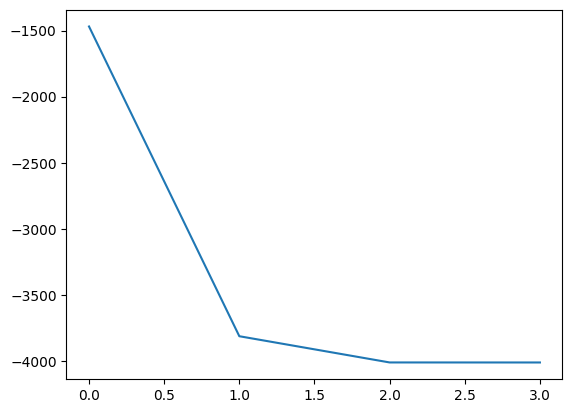

In [4]:
structure = bulk("Fe") * [10,10,10]
structure.rattle(0.3)
structure[0].symbol = "Al"
structure[10].symbol = "Al"
wf = Workflow("EnginePrototype", delete_existing_savefiles=True)
EngineInput = CalcInputMinimize()
EngineInput.energy_convergence_tolerance = 1e-5
EngineInput.force_convergence_tolerance = 1e-5
EngineInput.max_iterations = 1000000
EngineInput.max_evaluations = 1000000

Engine = LammpsEngine(EngineInput = EngineInput)

Engine.working_directory = "EnginePrototypeMinimize"
# Local
Engine.command = f"{lmp_cmd} -in in.lmp -log minimize.log"
# Engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.lammps_log_filepath = "minimize.log"
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf.calc = calculate_structure_node(structure = structure,
                                   calculation_engine = Engine)
wf.run()
# try:
#     wf.run()
# except Exception as e:
#     print("Failed because of: ", e)
# print(wf.calc.outputs.calc_output.value)
import matplotlib.pyplot as plt
plt.plot(wf.calc.outputs.calc_output.value.energies)

# NVT Lammps Test

2025-09-19 18:53:51,596 - pyiron_log - WARNING - Directory 'EnginePrototype_NVT_minimize' already exists. Existing files may be overwritten.
2025-09-19 18:53:51,748 - pyiron_log - WARNING - Directory 'EnginePrototype_NVT/nvt' already exists. Existing files may be overwritten.


current mode  minimize
current mode  md


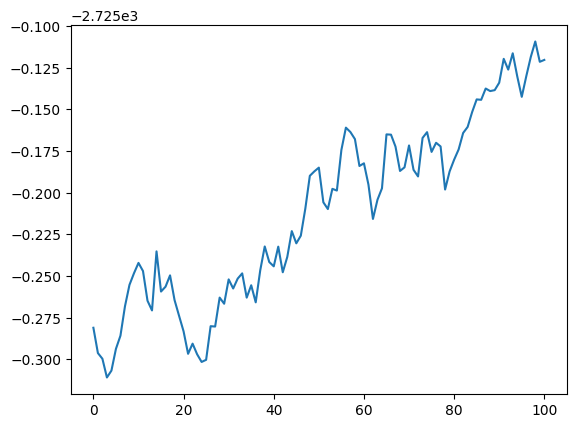

In [5]:
structure = bulk("Fe", cubic=True) * [7,7,7]#  * [10,10,10]
structure.rattle(0.3)
# structure[0].symbol = "C"
# structure[10].symbol = "C"
wf = Workflow("EnginePrototypeMD", delete_existing_savefiles=True)
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMD

EngineInput = CalcInputMinimize()
EngineInput.energy_convergence_tolerance = 1e-5
EngineInput.force_convergence_tolerance = 1e-5
EngineInput.max_iterations = 1000000
EngineInput.max_evaluations = 1000000

Engine = LammpsEngine(EngineInput = EngineInput)

Engine.working_directory = "EnginePrototype_NVT_minimize"
Engine.command = f"{lmp_cmd} -in in.lmp -log minimize.log"
Engine.lammps_log_filepath = "minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf.relax_calc = calculate_structure_node(structure = structure,
                                         calculation_engine = Engine)
MD_EngineInput = CalcInputMD(mode = "NVT",
                          temperature = 300,
                          temperature_damping_timescale = 100,
                          seed = 42,
                          time_step = 0.001,
                          n_print = 10,
                          n_ionic_steps = 1000,
                          thermostat = "langevin")

MD_Engine = LammpsEngine(EngineInput = MD_EngineInput)

MD_Engine.working_directory = "EnginePrototype_NVT/nvt"
MD_Engine.command = f"{lmp_cmd} -in in.lmp -log nvt.log"
MD_Engine.lammps_log_filepath = "nvt.log"
MD_Engine.input_script_pair_style = "eam/fs"
MD_Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf.calc = calculate_structure_node(structure = wf.relax_calc.outputs.calc_output.final_structure,
                                   calculation_engine = MD_Engine)
wf.run()
# try:
#     wf.run()
# except Exception as e:
#     print("Failed because of: ", e)
# print(wf.calc.outputs.calc_output.value)
import matplotlib.pyplot as plt
plt.plot(wf.calc.outputs.calc_output.value.energies)


# NPT Lammps

2025-09-19 18:53:52,672 - pyiron_log - WARNING - Directory 'EnginePrototype_NPT/minimize' already exists. Existing files may be overwritten.
2025-09-19 18:53:52,824 - pyiron_log - WARNING - Directory 'EnginePrototype_NPT/npt' already exists. Existing files may be overwritten.


current mode  minimize
current mode  md


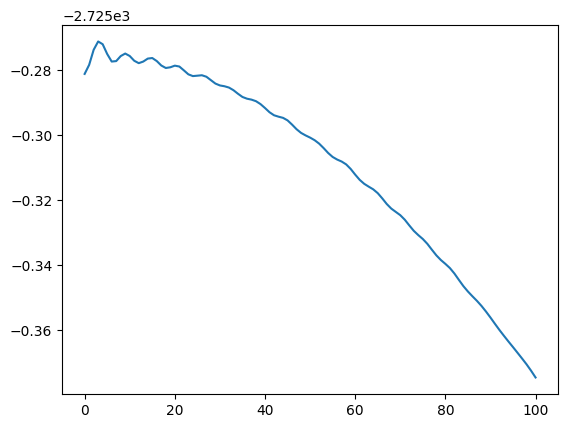

In [6]:
structure = bulk("Fe", cubic=True) * [7,7,7]#  * [10,10,10]
structure.rattle(0.3)
# structure[0].symbol = "C"
# structure[10].symbol = "C"
wf = Workflow("EnginePrototypeMD", delete_existing_savefiles=True)
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMD

EngineInput = CalcInputMinimize()
EngineInput.energy_convergence_tolerance = 1e-5
EngineInput.force_convergence_tolerance = 1e-5
EngineInput.max_iterations = 1000000
EngineInput.max_evaluations = 1000000

Engine = LammpsEngine(EngineInput = EngineInput)

Engine.working_directory = "EnginePrototype_NPT/minimize"
Engine.command = f"{lmp_cmd} -in in.lmp -log minimize.log"
Engine.lammps_log_filepath = "minimize.log"
Engine.input_script_pair_style = "eam/fs"
Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf.relax_calc = calculate_structure_node(structure = structure,
                                         calculation_engine = Engine)
MD_EngineInput = CalcInputMD(mode = "NPT",
                          temperature = 300,
                          temperature_damping_timescale = 100,
                          pressure = 1e5,
                          pressure_damping_timescale = 100,
                          seed = 42,
                          time_step = 0.001,
                          n_print = 10,
                          n_ionic_steps = 1000,
                          thermostat = "nose-hoover")

MD_Engine = LammpsEngine(EngineInput = MD_EngineInput)

MD_Engine.working_directory = "EnginePrototype_NPT/npt"
MD_Engine.command = f"{lmp_cmd} -in in.lmp -log minimize.log"
MD_Engine.lammps_log_filepath = "minimize.log"
MD_Engine.input_script_pair_style = "eam/fs"
MD_Engine.path_to_model = os.getcwd() + "/Al-Fe.eam.fs"

wf.calc = calculate_structure_node(structure = wf.relax_calc.outputs.calc_output.final_structure,
                                   calculation_engine = MD_Engine)
wf.run()
# try:
#     wf.run()
# except Exception as e:
#     print("Failed because of: ", e)
# print(wf.calc.outputs.calc_output["lammps_output"].value)
import matplotlib.pyplot as plt
plt.plot(wf.calc.outputs.calc_output.value.energies)